In [21]:
import pandas as pd  # Import Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib for creating visualizations
import numpy as np  # Import NumPy for numerical operations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Salary_Data.csv')

# Extract the independent variable (Years of Experience) from the DataFrame
x = df.iloc[:, 0]

# Extract the dependent variable (Salary) from the DataFrame
y = df.iloc[:, 1]

# Display the first few rows of the DataFrame for inspection
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [23]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Reshape the training data into a 2D array if there's only one feature
if x_train.ndim == 1:
    x_train = x_train.values.reshape(-1, 1)

In [24]:
# Create a linear regression model
regressor = LinearRegression()

# Train the model on the training data (x_train and y_train)
# This step fits the model to the data, learning the relationship between
# the independent variable (x_train) and the dependent variable (y_train)
regressor.fit(x_train, y_train)



LinearRegression()

In [26]:
# Predict the values for x_test
y_pred = regressor.predict(x_test.values.reshape(-1,1))
y_pred


array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

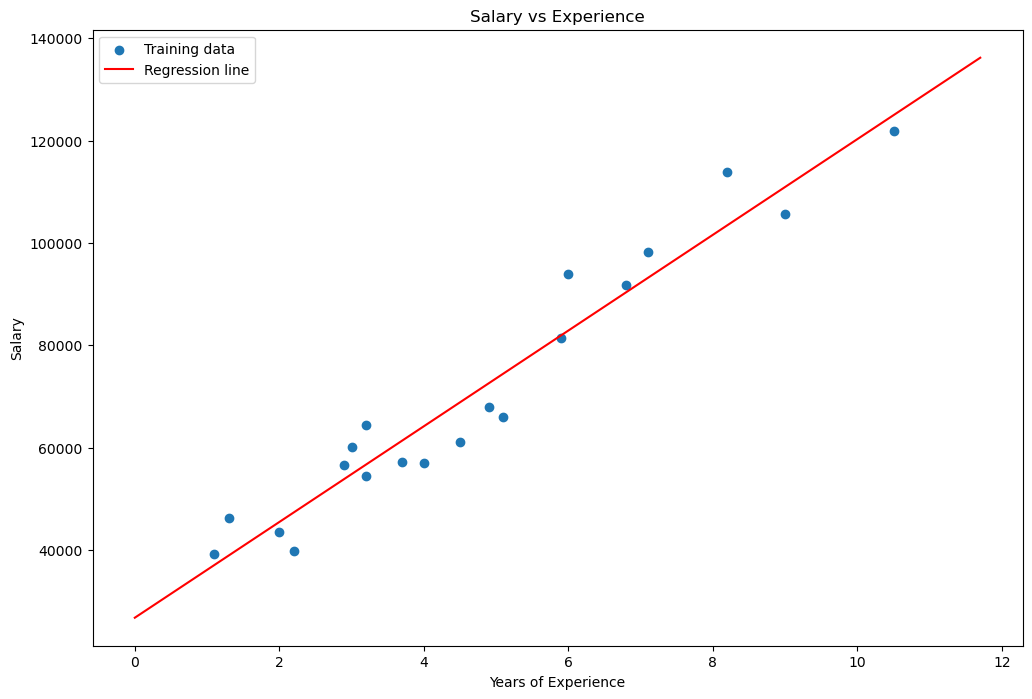

In [28]:
# Create a figure with a specified size
fig = plt.figure(figsize=(12, 8))

# Plot the training data points as a scatter plot
plt.scatter(x_train, y_train, label='Training data')

# Generate a range of values from 0 to 12 with a step of 0.3
x_range = np.arange(0, 12, 0.3)

# Predict the y values using the trained regressor for the generated x values
y_pred_line = regressor.predict(x_range.reshape(-1, 1))

# Plot the regression line with the predicted values
plt.plot(x_range, y_pred_line, color='red', label='Regression line')

# Add a title to the plot
plt.title('Salary vs Experience')

# Label the x-axis
plt.xlabel('Years of Experience')

# Label the y-axis
plt.ylabel('Salary')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


## Fitting Model

### P Value
The P value helps to determine the significance of the result and is used in hypothesis testing. The hypothesis under testing is called the Null Hypothesis. The lower the P value, the better the model. In short, the P value tells the scope of the error. For example, if the P value is 0.02, then there is a 2% chance that the claims made might not hold true. Typically, the limit of the P value is set to 5%.

### Backward Elimination
1. Set significance level (e.g., SL = 0.05).
2. Fit the model with all possible predictors.
3. Check the highest P values. If any one of them is greater than SL, remove the variable and rebuild the model.
4. Repeat until no P value is greater than SL.

### Forward Elimination
1. Set significance level (e.g., SL = 0.05).
2. Make a model for every variable and choose the one whose addition gives the highest significance level.
3. Repeat until no additional variable is significant.

### Bidirectional Elimination
1. Set significance levels for entering and staying (e.g., SLEnter = 0.05, SLStay = 0.05).
2. Perform one step of forward elimination. New variables must have P < SLEnter.
3. Perform all steps of backward elimination. Variables should have P < SLStay to stay.
4. Repeat until equilibrium is reached.

### All Possible Models
1. Select a criterion of fitness (e.g., Akaike Information Criterion).
2. Create one model for every possible combination of variables.
3. Select the model with the best criterion value.



## Multiple Linear Regression

In [33]:
# Read the CSV file into a DataFrame
df = pd.read_csv('50_Startups.csv')

# Display the first five rows of the DataFrame
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
# Select all columns except the last one for the feature set 'x'
x = df.iloc[:, :-1]

# Select the 'Profit' column for the target variable 'y'
y = df['Profit']

# One Hot Encode the 'State' column to convert categorical data into numerical data
x = pd.get_dummies(x, columns=['State'])

# Avoid the dummy variable trap by removing the last column of the one-hot encoded 'State' columns
# This is done to prevent multicollinearity in the model
x = x.iloc[:, :-1]

# Display the first five rows of the modified DataFrame
x.head()


,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,False,False
1,162597.70,151377.59,443898.53,True,False
2,153441.51,101145.55,407934.54,False,True
3,144372.41,118671.85,383199.62,False,False
4,142107.34,91391.77,366168.42,False,True


In [41]:
# Split the dataset into training and testing sets
# 'test_size=0.2' means 20% of the data will be used for testing, and 80% for training
# 'random_state=0' ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create a Linear Regression model
regressor = LinearRegression()

# Train the model on the training data (x_train and y_train)
regressor.fit(x_train, y_train)

# Predict the target values for the test set (x_test)
y_pred = regressor.predict(x_test)

# Print the predicted values
print("Predicted values:", y_pred)

# Print the actual values from the test set
print("Actual values:", y_test)


Predicted values: [103015.20159776 132582.27760831 132447.73845184  71976.09851266
 178537.4822107  116161.24230157  67851.69209689  98791.73374679
 113969.43533008 167921.06569569]
Actual values: 28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64
